In [55]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error,confusion_matrix,accuracy_score,classification_report
df=pd.read_csv('Housing.csv')
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
#2 Check the shape of the DataFrame (rows, columns)
df.shape

(545, 13)

In [3]:
#3 Look at the data types of the columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [4]:
#4 Check for missing  values if any, replace with appropriate values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
#5 Prepare  X (independent variables) and y (dependent variable)
x=df.drop(columns='price')
y=df['price']

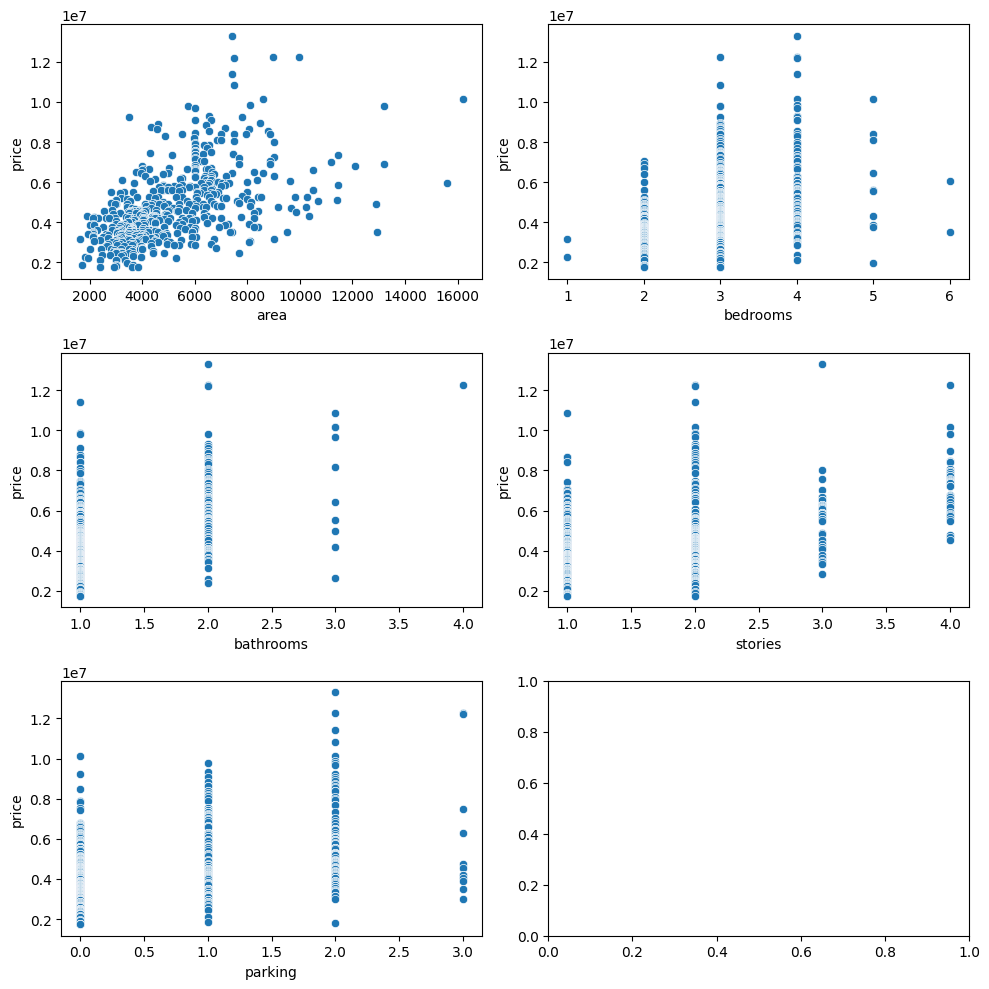

In [16]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
cols=x.select_dtypes(include='number').columns
fig,axes=plt.subplots(3,2,figsize=(10,10))
axes=axes.flatten()
for i,col in enumerate(cols):
    cur_ax=axes[i]
    sns.scatterplot(x=df[col],y=y,ax=cur_ax)
    cur_ax.set_xlabel(col)
    cur_ax.set_ylabel('price')
plt.tight_layout()
plt.show()

In [21]:
#7 Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder

cols=x.select_dtypes(include='object').columns
for col in cols:
    encoder=LabelEncoder()
    x[col]=encoder.fit_transform(x[col])
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0


In [27]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler
cols=x.select_dtypes(include='number').columns.to_list()
sc=StandardScaler()
x[cols]=sc.fit_transform(x[cols])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [29]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)
x_train.shape

(381, 12)

In [32]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [38]:
print("intercept:",model.intercept_)
print("coefff:",model.coef_)

intercept: 4792930.215900067
coefff: [ 548676.87299684   61007.57353683  560930.5907925   360373.26651063
  142224.01475101  106921.0156196   231390.66504408  129694.29500784
  316035.20938106  261749.09078536  215958.74730928 -150637.2491008 ]


In [40]:
y_pred_m=model.predict(x_test)
print(y_pred_m[:5])

[5407508.87024418 7097185.46706854 3055462.44314053 4476945.19636315
 3315983.65663579]


In [43]:
#12 Predict on the train set and calculate the error = y_pred - y_train
y_pred=model.predict(x_train)
error=y_pred-y_train
print(error[:5])

126   -5.477012e+05
363   -1.499996e+05
370    7.643610e+05
31    -1.977171e+06
113    2.678948e+05
Name: price, dtype: float64


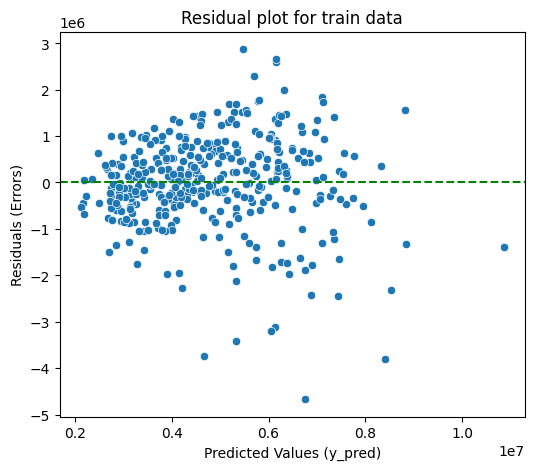

In [48]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_pred,y=error)
plt.axhline(y=0,color="green",linestyle='dashed')
plt.xlabel("Predicted Values (y_pred)")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot - Test")
plt.title("Residual plot for train data")
plt.show()

In [51]:
#14  Predic on the test set
y_p=model.predict(x_test)
err=y_p-y_test
print(err[:5])

316    1.347509e+06
77     4.471855e+05
360   -6.545376e+05
90    -1.963055e+06
493    5.159837e+05
Name: price, dtype: float64


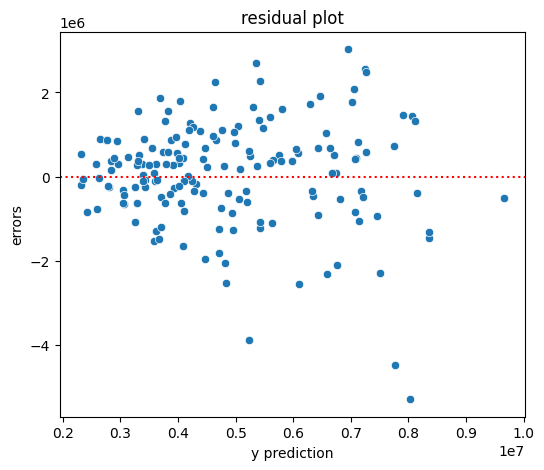

In [53]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_p,y=err)
plt.axhline(y=0,color="red",linestyle="dotted")
plt.xlabel("y prediction")
plt.ylabel("errors")
plt.title("residual plot")
plt.show()

In [58]:
#16 Print Mean Squared Error and R Squared Value
mse=mean_squared_error(y_test,y_p)
r2=r2_score(y_test,y_p)
print(mse)
print(r2)

1535047758428.0493
0.6435419628959108


In [59]:
# Manual calculation

#  mse = sum of (yact - ypred)^2 / n
n=y_test.shape[0]
mse=np.sum((y_test-y_p)**2)/n
print(mse)

1535047758428.0493


In [62]:


# r2 = 1 - ss_res / ss_tot

# ss_res = sum(yact - ypred)^2
# ss_tot = sum(yact - ymean)^2
ss_res=np.sum((y_test-y_p)**2)
ss_tot=np.sum((y_test-y_test.mean())**2)
r=1-ss_res/ss_tot
print(r)

0.6435419628959108
